# Indicador de Desempenho do Estudante


#### Ciclo de Vida de um Projeto de Aprendizado de Máquina

- Compreensão da Declaração do Problema
- Coleta de Dados
- Verificações de Dados a Realizar
- Análise Exploratória de Dados
- Pré-processamento de Dados
- Treinamento do Modelo
- Escolha do Melhor Modelo


## 1) Declaração do Problema


- Este projeto compreende como o desempenho do aluno (notas em testes) é afetado por outras variáveis, como Gênero, Etnia, Nível educacional dos pais, Almoço e Curso de preparação para testes.

## 2) Coleta de Dados


- Fonte do Conjunto de Dados - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Os dados consistem em 8 colunas e 1000 linhas.


### 2.1 Importar Dados e Pacotes Necessários
####  Importando as Bibliotecas Pandas, Numpy, Matplotlib, Seaborn e Warnings

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importar o Arquivo CSV como um DataFrame do Pandas

In [3]:
df = pd.read_csv('data/stud.csv')

#### Mostrar os 5 Primeiros Registros

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape do conjunto

In [5]:
df.shape

(1000, 8)

### 2.2 Informações do Dataset

- gender :  sexo dos alunos -> (Masculino/Feminino)
- race/ethnicity : etnia dos alunos -> (Grupo A, B, C, D, E)
- parental level of education : educação final dos pais -> (diploma de bacharel, algum tempo na faculdade, mestrado, diploma de associado, ensino médio)
- lunch :  ter almoço antes do teste (padrão ou gratuito/reduzido)
- test preparation course : completo ou não completo antes do teste
- math score : nota de matemática
- reading score : nota de leitura
- writing score : nota de escrita

## 3.Verificações de Dados a Realizar



- **Verificar Valores Ausentes**
- **Verificar Duplicatas**
- **Verificar Tipo de Dados**
- **Verificar o Número de Valores Únicos em Cada Coluna**
- **Verificar Estatísticas do Conjunto de Dados**
- **Verificar as Várias Categorias Presentes nas Diferentes Colunas Categóricas**

### 3.1 Verificar Valores Ausentes

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Não há valores ausentes no conjunto de dados.

### 3.2 Verificar Duplicatas

In [7]:
df.duplicated().sum()

np.int64(0)

#### Não há valores duplicados no conjunto de dados.

### 3.3 Verificar Tipo de Dados

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Verificar o Número de Valores Únicos em Cada Coluna

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Verificar Estatísticas do Conjunto de Dados

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
- A partir da descrição dos dados numéricos, todas as médias estão muito próximas umas das outras - entre 66 e 68,05.
- Todos os desvios padrão também são próximos - entre 14,6 e 15,19.
- Enquanto a nota mínima em matemática é 0, a mínima em escrita é muito mais alta, igual a 10, e a mínima em leitura é ainda mais alta, igual a 17.

### 3.6 Verificar as Várias Categorias Presentes nas Diferentes Colunas Categóricas

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.7 Explorando os dados

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
print("Categorias na variável 'gênero':     ", end=" ")
print(df['gender'].unique())

print("Categorias na variável 'raça_etnia':  ", end=" ")
print(df['race_ethnicity'].unique())

print("Categorias na variável 'nível educacional dos pais':", end=" ")
print(df['parental_level_of_education'].unique())

print("Categorias na variável 'almoço':     ", end=" ")
print(df['lunch'].unique())

print("Categorias na variável 'curso de preparação para testes':     ", end=" ")
print(df['test_preparation_course'].unique())


Categorias na variável 'gênero':      ['female' 'male']
Categorias na variável 'raça_etnia':   ['group B' 'group C' 'group A' 'group D' 'group E']
Categorias na variável 'nível educacional dos pais': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorias na variável 'almoço':      ['standard' 'free/reduced']
Categorias na variável 'curso de preparação para testes':      ['none' 'completed']


In [25]:
# Definir colunas numéricas e categóricas
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Imprimir colunas
print('Temos {} variáveis numéricas: {}'.format(len(numeric_features), numeric_features))
print('\nTemos {} variáveis categóricas: {}'.format(len(categorical_features), categorical_features))


Temos 5 variáveis numéricas: ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

Temos 5 variáveis categóricas: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adicionando Colunas para "Nota Total" e "Média"

In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Número de alunos com nota máxima em Matemática: {math_full}')
print(f'Número de alunos com nota máxima em Escrita: {writing_full}')
print(f'Número de alunos com nota máxima em Leitura: {reading_full}')


Número de alunos com nota máxima em Matemática: 7
Número de alunos com nota máxima em Escrita: 14
Número de alunos com nota máxima em Leitura: 17


In [27]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Número de alunos com menos de 20 pontos em Matemática: {math_less_20}')
print(f'Número de alunos com menos de 20 pontos em Escrita: {writing_less_20}')
print(f'Número de alunos com menos de 20 pontos em Leitura: {reading_less_20}')


Número de alunos com menos de 20 pontos em Matemática: 4
Número de alunos com menos de 20 pontos em Escrita: 3
Número de alunos com menos de 20 pontos em Leitura: 1


##### Insights
- A partir dos valores acima, observamos que os alunos tiveram o pior desempenho em Matemática.
- O melhor desempenho foi na seção de Leitura.

## 4. Explorando os Dados (Visualização)

#### 4.1 Visualizar a Distribuição da Média das Notas para Chegar a Algumas Conclusões




- **Histograma**
- **Função de Distribuição de Kernel (KDE)**

##### 4.1.1 Histograma & KDE

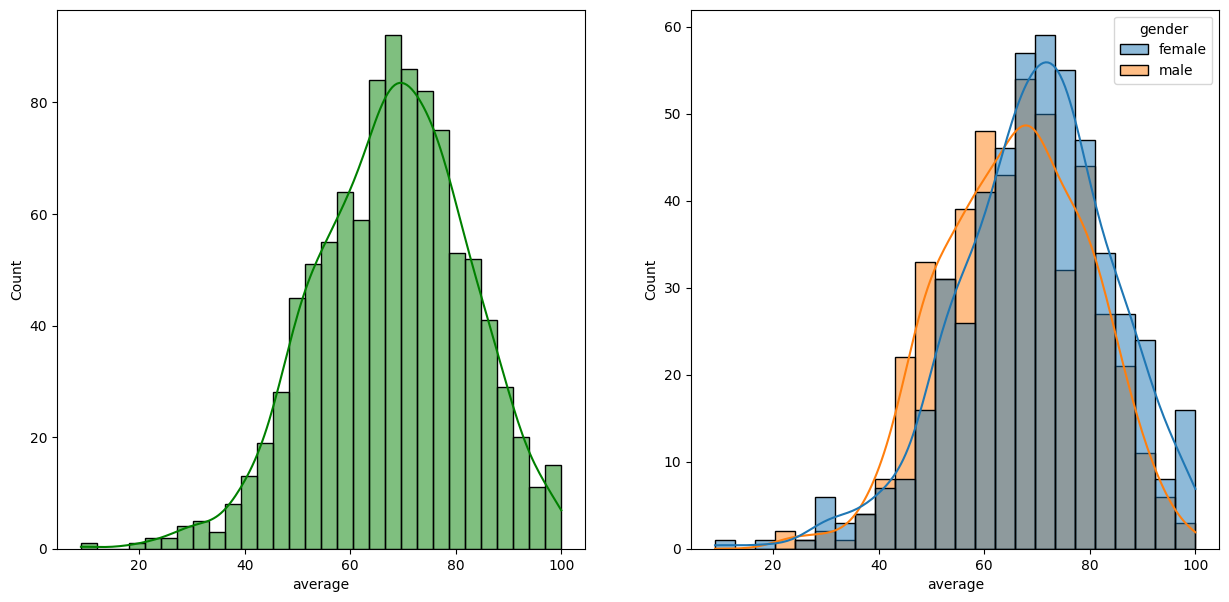

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

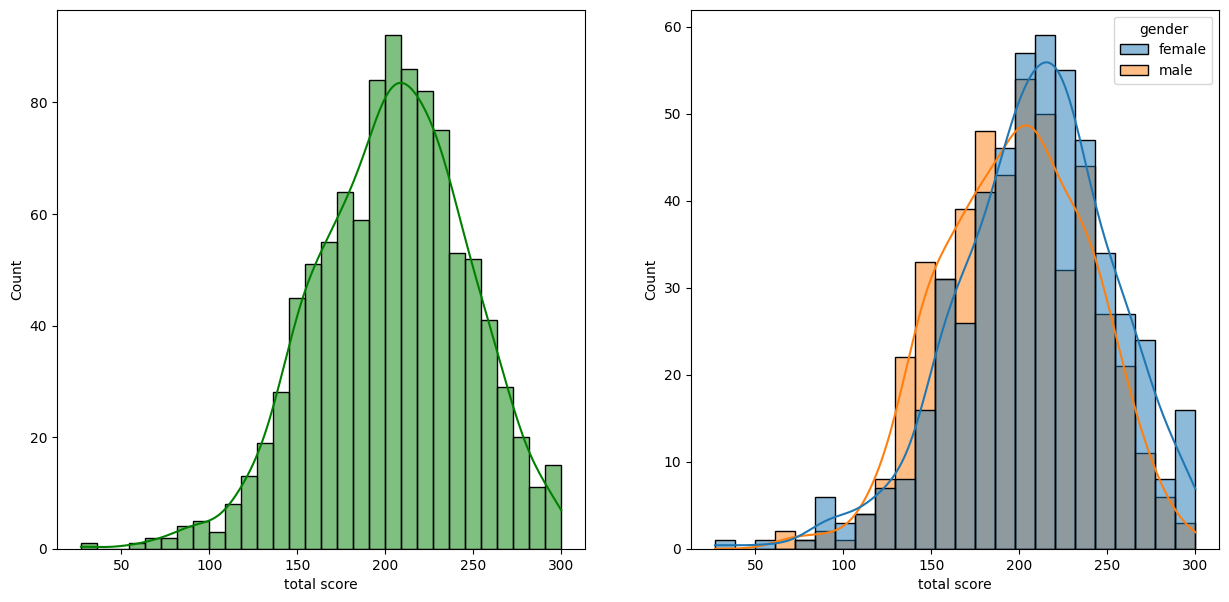

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

##### Insights
- As alunas tendem a ter um desempenho melhor do que os alunos.

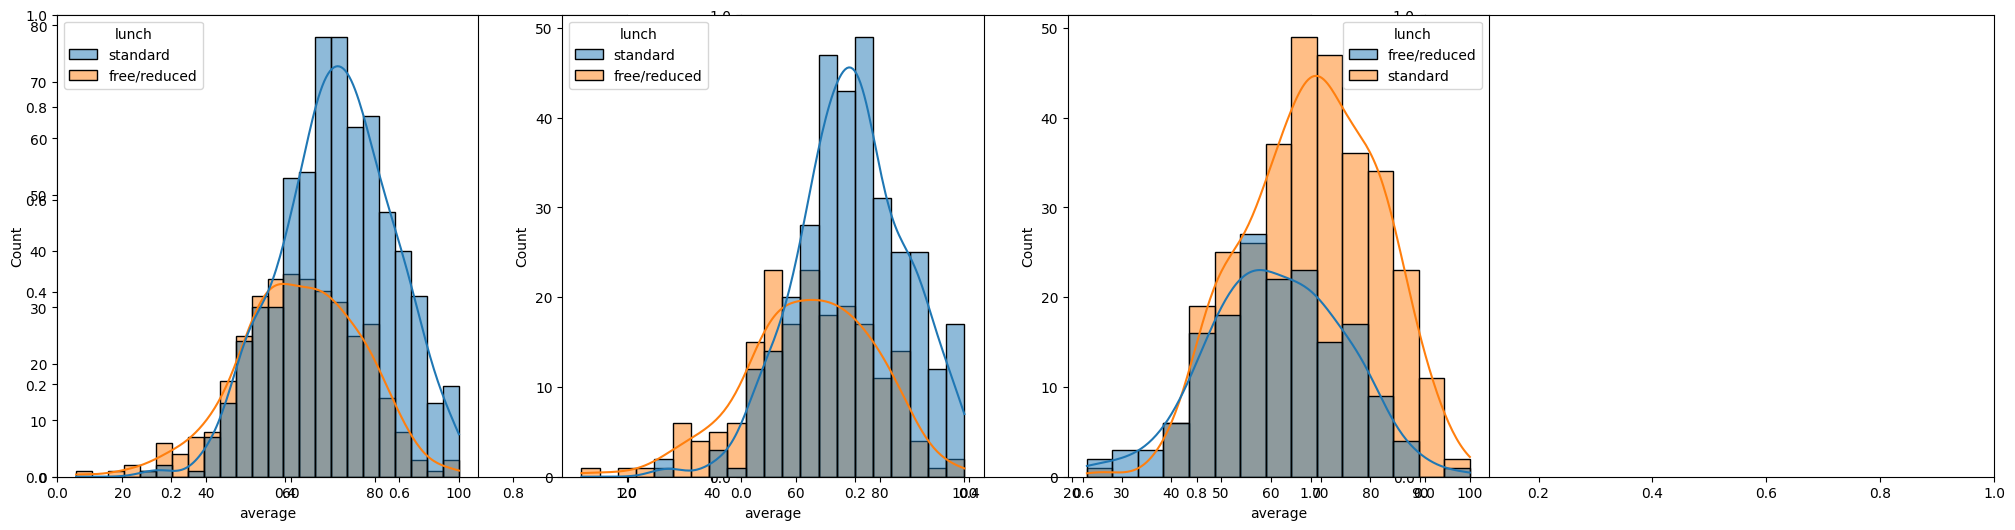

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Insights
- Almoçar no padrão ajuda a ter um bom desempenho nos exames.
- Almoçar no padrão ajuda a ter um bom desempenho nos exames, tanto para alunos quanto para alunas.

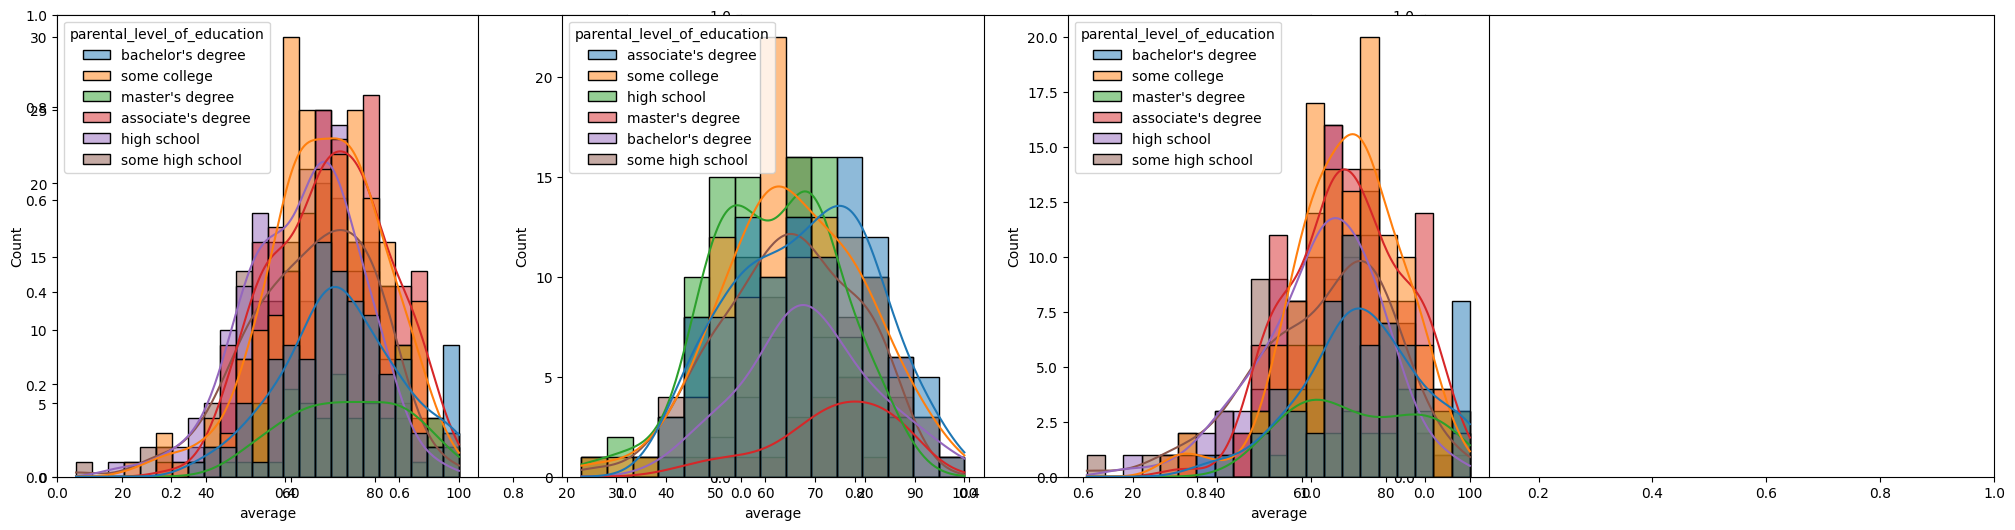

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

##### Insights
- De maneira geral, a educação dos pais não contribui para que os alunos tenham um bom desempenho nos exames.
- O segundo gráfico mostra que, para pais com diploma de associado ou mestrado, seus filhos do sexo masculino tendem a ter um desempenho melhor nos exames.
- No terceiro gráfico, podemos observar que não há efeito da educação dos pais sobre as alunas.

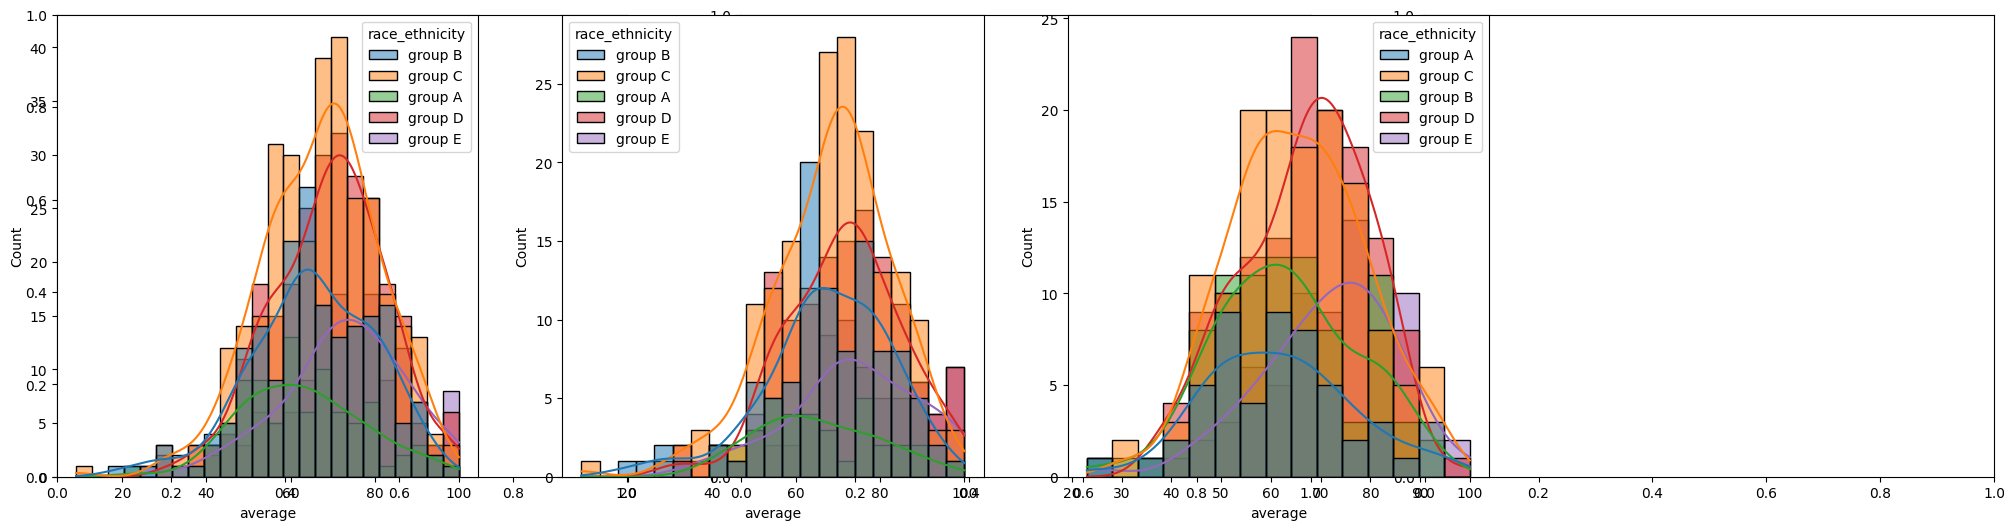

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

##### Insights
- Os alunos dos grupos A e B tendem a ter um desempenho ruim nos exames.
- Essa tendência de baixo desempenho se mantém independentemente de serem alunos do sexo masculino ou feminino.

#### 4.2 Pontuação Máxima dos Alunos nas Três Matérias

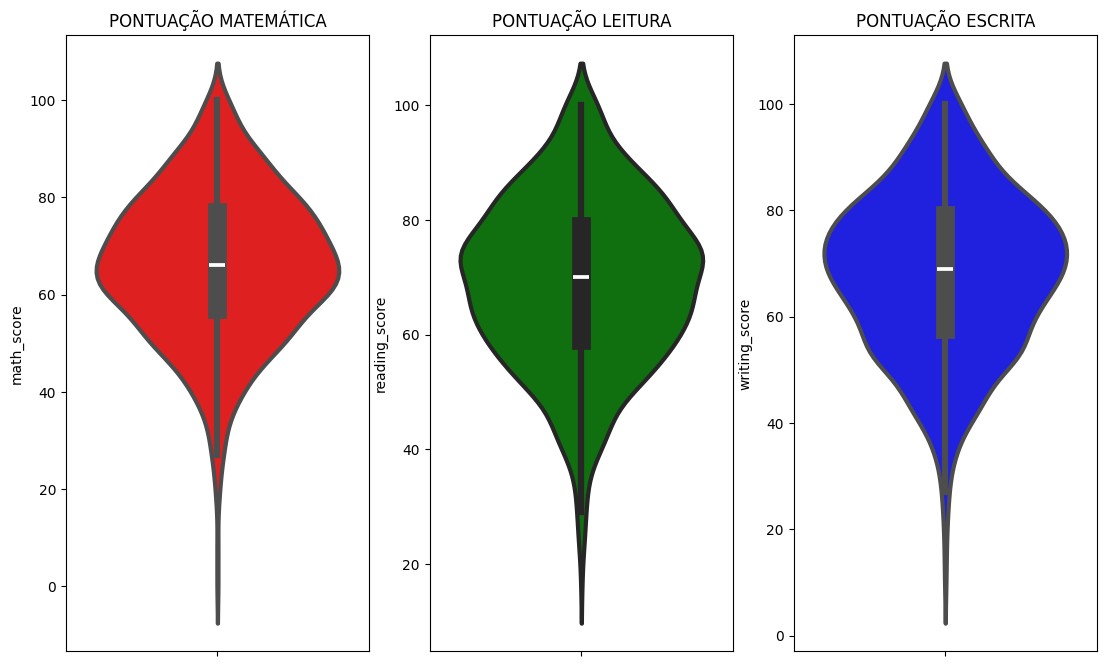

In [33]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('PONTUAÇÃO MATEMÁTICA')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('PONTUAÇÃO LEITURA')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('PONTUAÇÃO ESCRITA')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

##### Insights
- A partir dos três gráficos, é claramente visível que a maioria dos alunos obtém notas entre 60 e 80 em Matemática, enquanto em Leitura e Escrita, a maioria deles pontua entre 50 e 80.

#### 4.3 Análise Multivariada usando Gráfico de Pizza

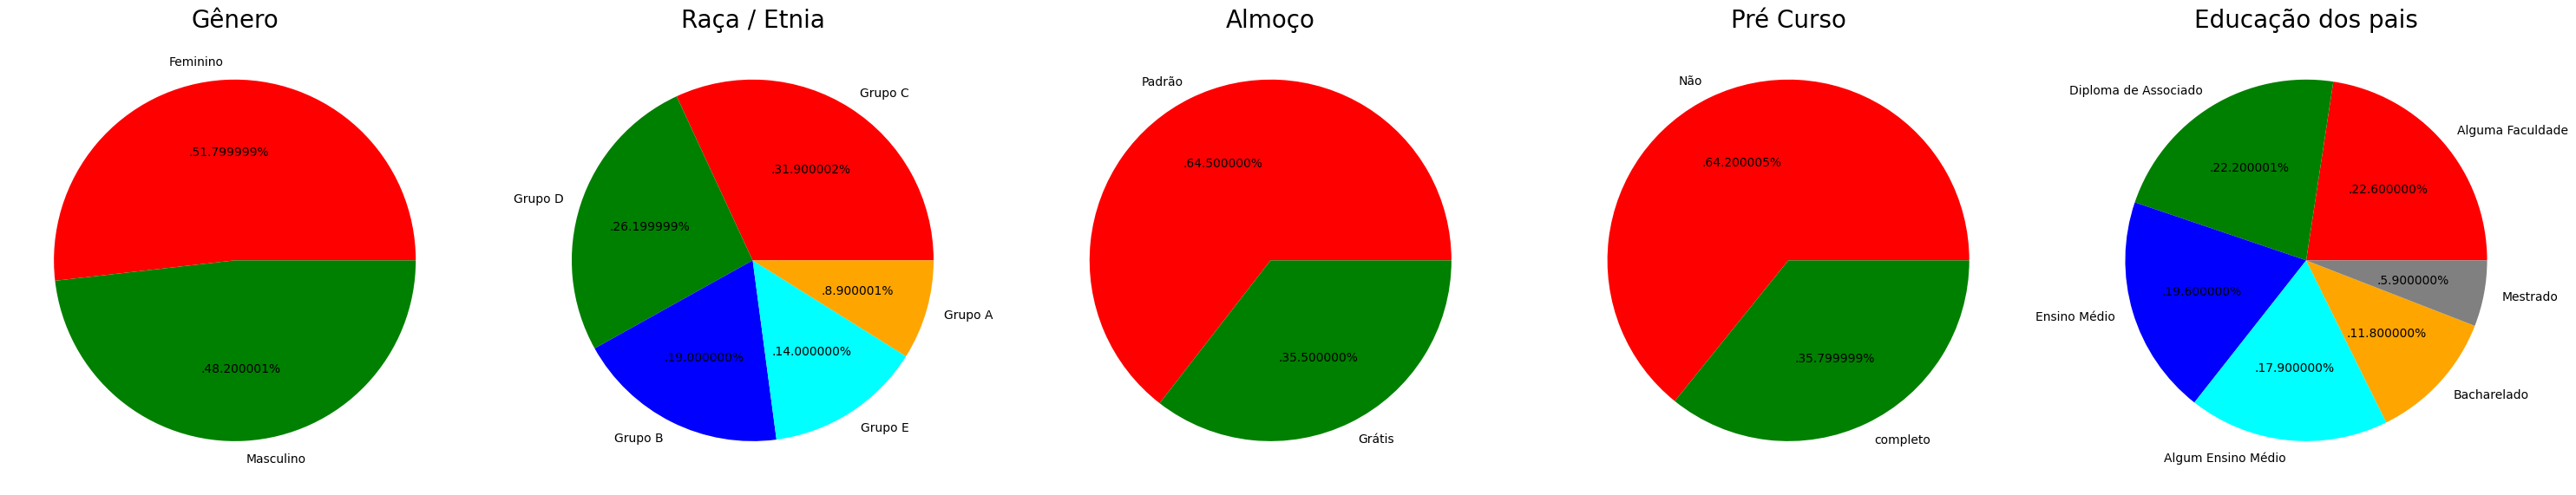

In [38]:
plt.rcParams['figure.figsize'] = (30, 20)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Feminino', 'Masculino'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gênero', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Grupo C', 'Grupo D','Grupo B','Grupo E','Grupo A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Raça / Etnia', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Padrão', 'Grátis'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Almoço', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'Não', 'completo'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Pré Curso', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Alguma Faculdade', "Diploma de Associado",'Ensino Médio','Algum Ensino Médio',"Bacharelado","Mestrado"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Educação dos pais', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Insights
- O número de alunos do sexo masculino e feminino é quase igual.
- O número de alunos é maior no Grupo C.
- O número de alunos que têm almoço padrão é maior.
- O número de alunos que não se inscreveram em nenhum curso de preparação para testes é maior.
- O número de alunos cujos pais têm "Alguma Faculdade" é maior, seguido de perto por "Diploma de Associado".

#### 4.4 Visualização por Característica

###### 4.4.1 COLUNA DE GÊNERO




- Como é a distribuição de Gênero?
- O gênero tem algum impacto no desempenho do aluno?


##### ANÁLISE UNIVARIADA (Como é a distribuição de Gênero?)

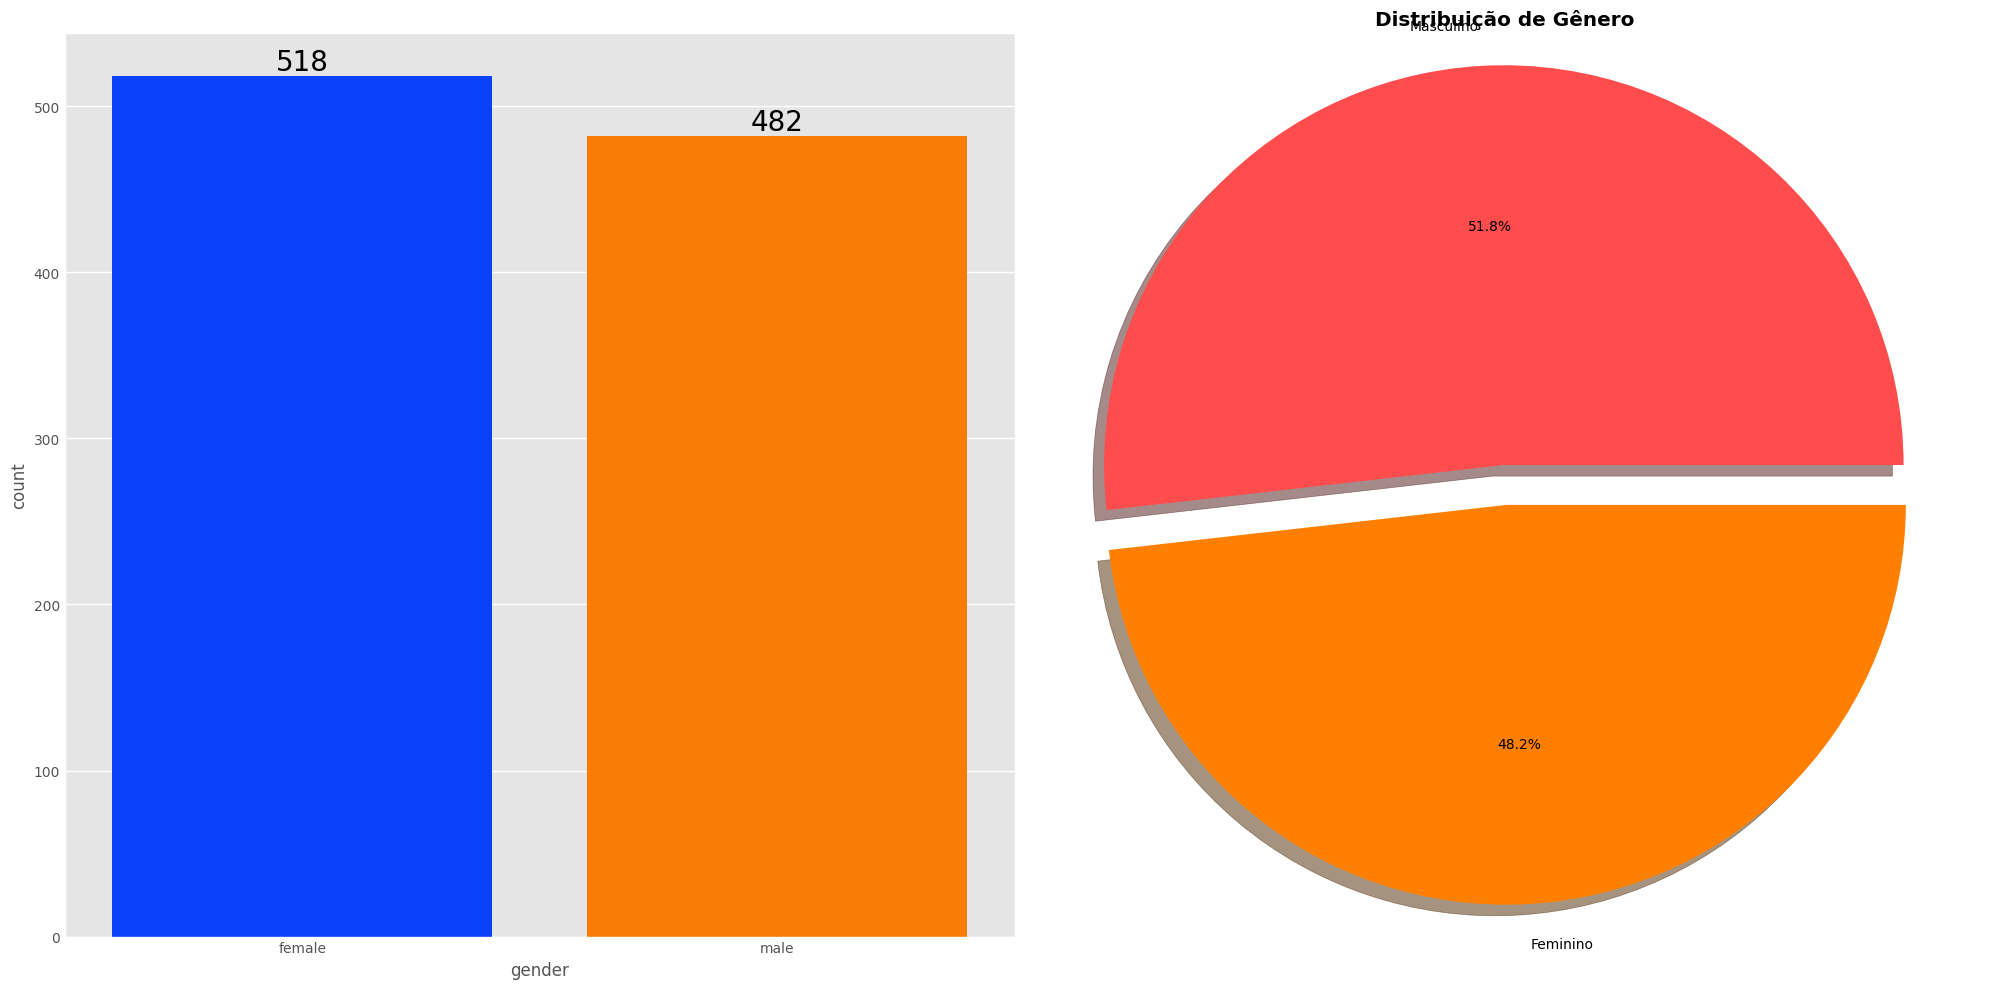

In [205]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico de contagem
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Gráfico de pizza
ax[1].pie(df['gender'].value_counts(), 
          labels=['Masculino', 'Feminino'], 
          explode=[0, 0.1], 
          autopct='%1.1f%%', 
          shadow=True, 
          colors=['#ff4d4d', '#ff8000'])
ax[1].axis('equal')  # Garante que o gráfico de pizza seja circular
ax[1].set_title('Distribuição de Gênero', fontweight='bold')

# Exibir os gráficos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

##### Insights 
- O gênero possui dados equilibrados, com 518 alunas (48%) e 482 alunos (52%).

##### ANÁLISE BIVARIADA (O gênero tem algum impacto no desempenho do aluno?)

In [189]:
# Filtrando as pontuações de matemática por gênero
media_por_genero_feminino = df[df.gender == 'female'].average
media_por_genero_masculino = df[df.gender == 'male'].average

# Filtrando as pontuações médias por gênero
matematica_por_genero_feminino = df[df.gender == 'female'].math_score
matematica_por_genero_masculino = df[df.gender == 'male'].math_score


# Criando um dicionário matemática
matematica_por_genero = {
    'Feminino': matematica_por_genero_feminino.tolist(),  # Convertendo para lista
    'Masculino': matematica_por_genero_masculino.tolist()   # Convertendo para lista
}

# Criando um dicionário média
media_por_genero = {
    'Feminino': media_por_genero_feminino.tolist(),  # Convertendo para lista
    'Masculino': media_por_genero_masculino.tolist()   # Convertendo para lista
}


# Exibindo o dicionário
print(matematica_por_genero.keys())
print('Matemática feminino: \n{}'.format(matematica_por_genero['Feminino'][:5]))
print('Média feminino: \n{}'.format(media_por_genero['Feminino'][:5]))



dict_keys(['Feminino', 'Masculino'])
Matemática feminino: 
[72, 69, 90, 71, 88]
Média feminino: 
[72.66666666666667, 82.33333333333333, 92.66666666666667, 77.33333333333333, 91.66666666666667]


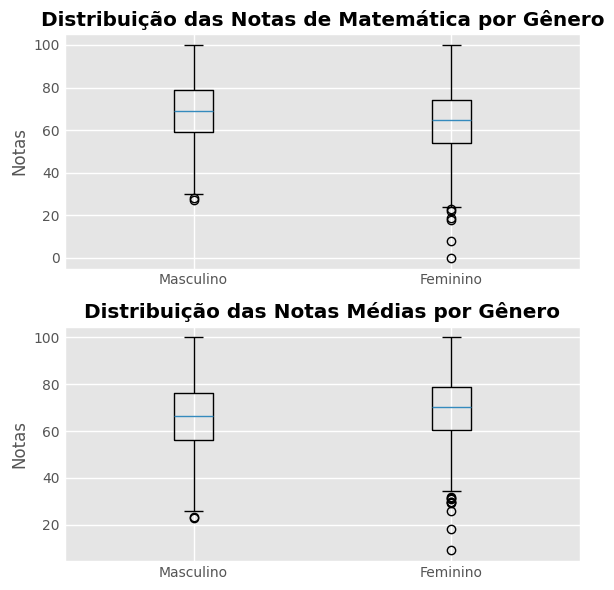

In [203]:
notas_femininas_mat = matematica_por_genero['Feminino']
notas_masculinas_mat = matematica_por_genero['Masculino']
notas_femininas_med = media_por_genero['Feminino']
notas_masculinas_med = media_por_genero['Masculino']



plt.figure(figsize=(6, 6))  # Ajuste o tamanho da figura conforme necessário

# Primeiro boxplot
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, 1º gráfico
plt.boxplot([notas_masculinas_mat, notas_femininas_mat], labels=['Masculino', 'Feminino'])
plt.ylabel("Notas")
plt.title("Distribuição das Notas de Matemática por Gênero", fontweight='bold')

# Segundo boxplot
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, 2º gráfico
plt.boxplot([notas_masculinas_med, notas_femininas_med], labels=['Masculino', 'Feminino'])
plt.ylabel("Notas")
plt.title("Distribuição das Notas Médias por Gênero", fontweight='bold')

# Exibir os gráficos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


##### Insights
- Em média, as mulheres têm um melhor desempenho geral do que os homens.
- Enquanto isso, os homens tiveram um desempenho melhor em Matemática.

##### 4.4.2 COLUNA RAÇA/ETNIA


- Como é a distribuição por grupo?
- A raça/etnia tem algum impacto no desempenho dos alunos?

##### ANÁLISE UNIVARIADA (Como é a distribuição por grupo?)

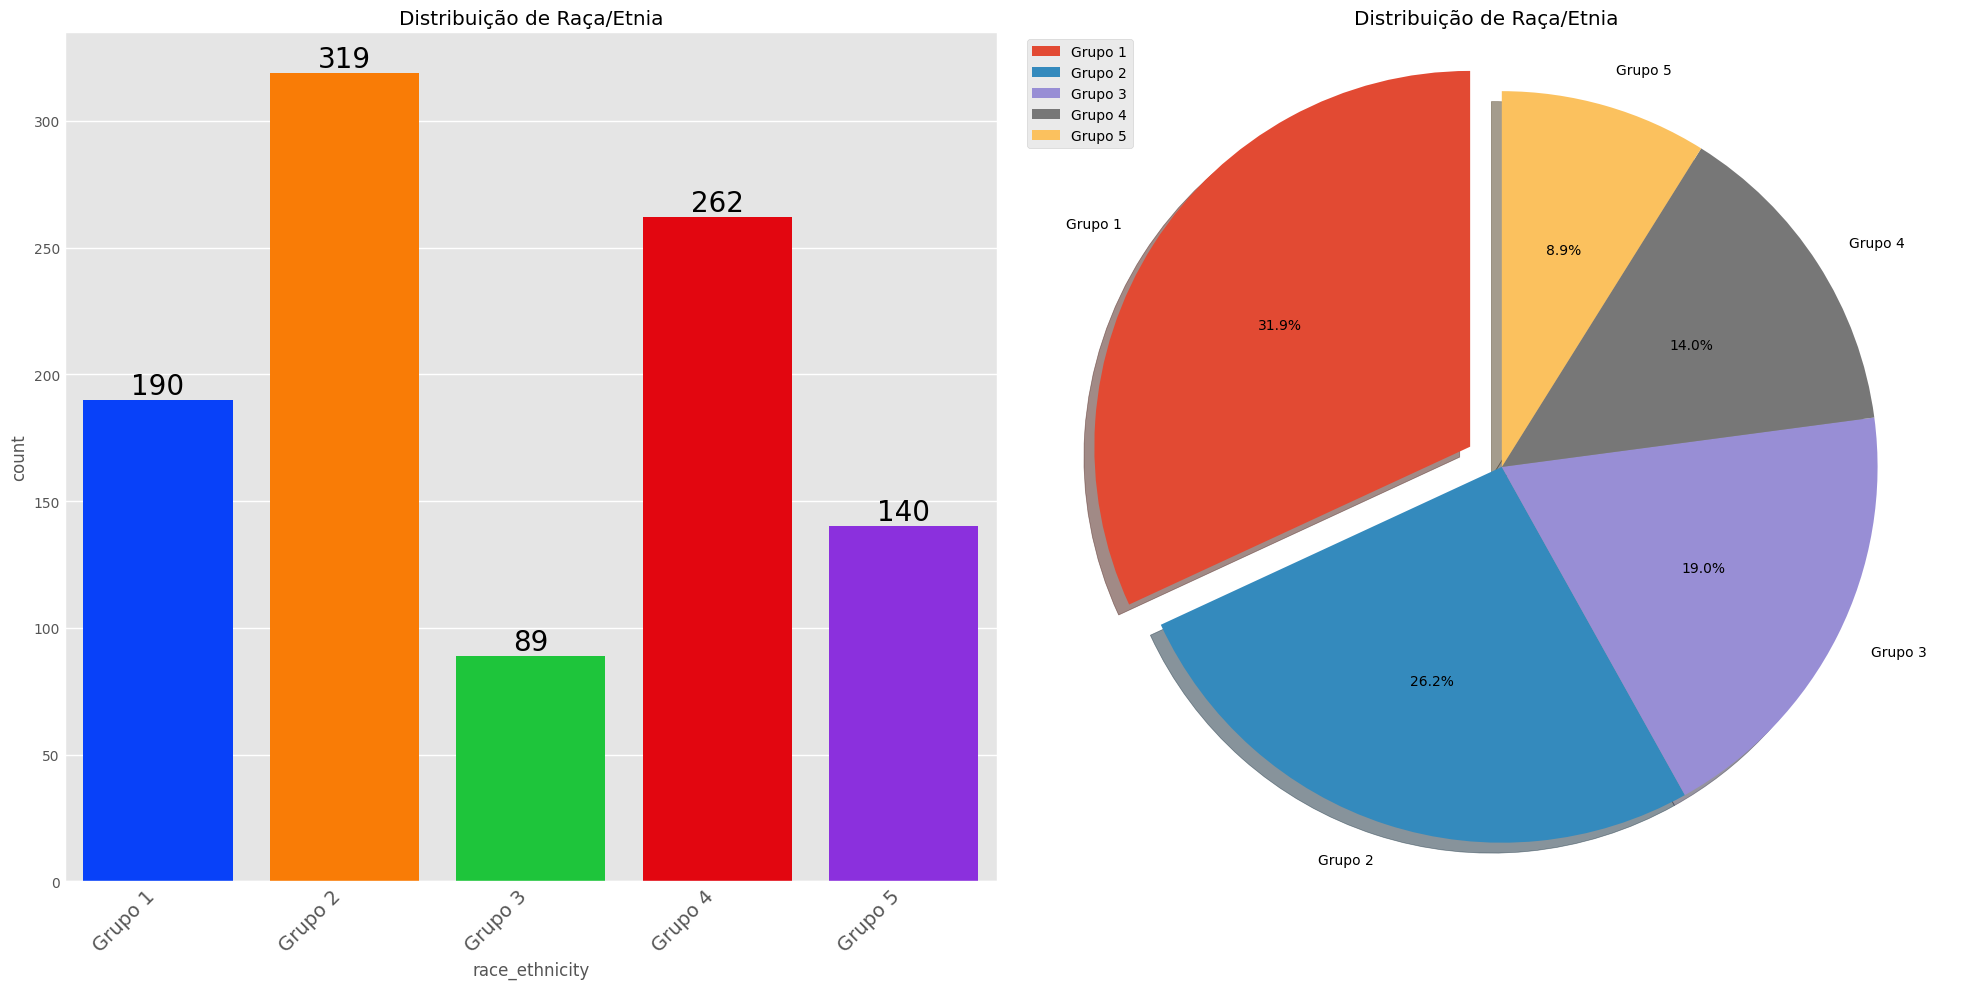

In [120]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico de contagem
sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Trocar os nomes do eixo X
new_labels = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5']  
ax[0].set_xticklabels(new_labels, rotation=45, ha='right', fontsize=14)
ax[0].set_title('Distribuição de Raça/Etnia')

# Gráfico de pizza
labels_pie = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5']
ax[1].pie(x=race_counts, labels=labels_pie, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].axis('equal')  # Garante que o gráfico seja circular
ax[1].set_title('Distribuição de Raça/Etnia')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


##### Insights 
- A maioria dos alunos pertence ao grupo C / grupo D.
- O menor número de alunos pertence ao grupo A.

##### ANÁLISE BIVARIADA (A raça/etnicidade tem algum impacto no desempenho dos alunos?)

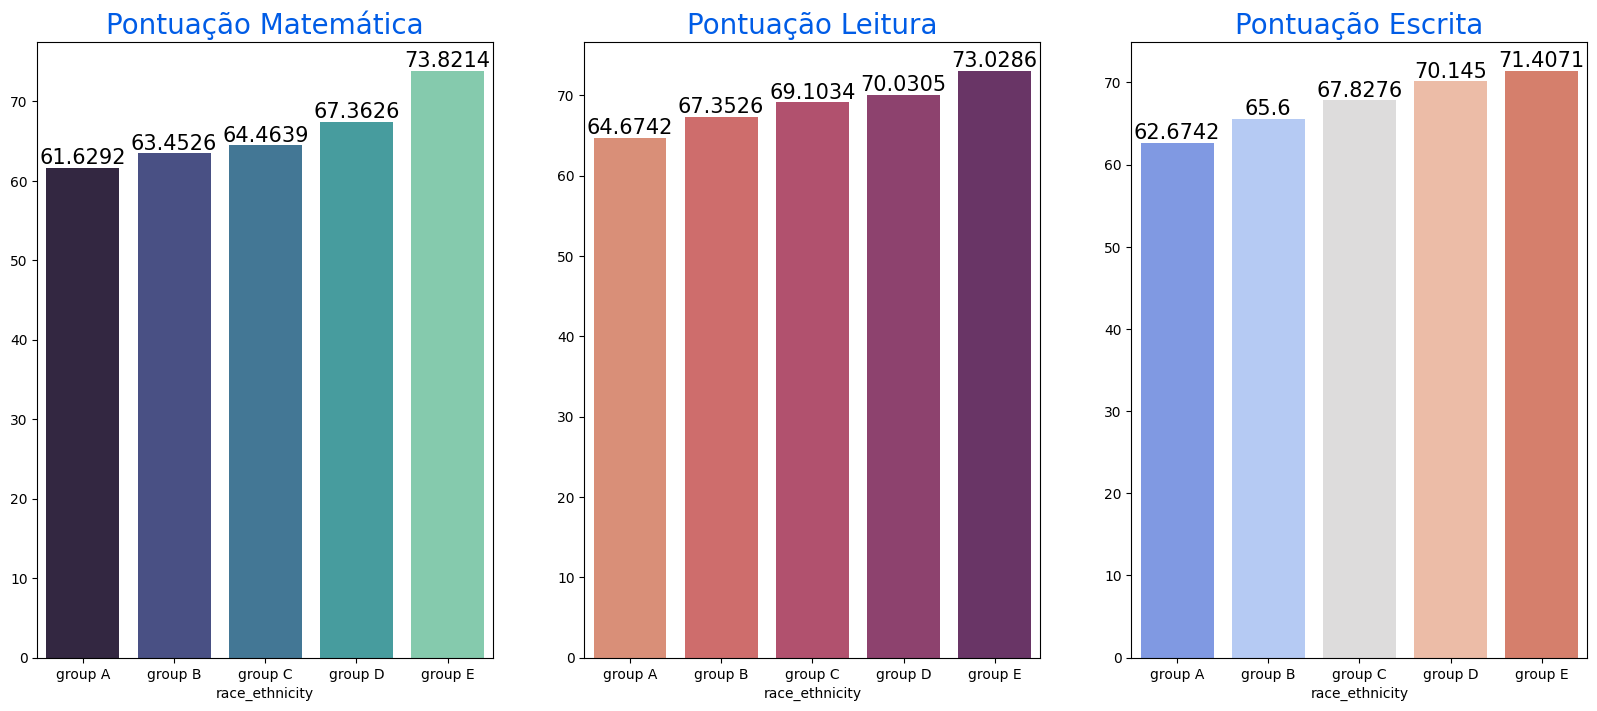

In [48]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Pontuação Matemática',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Pontuação Leitura',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Pontuação Escrita',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights 
- Os alunos do grupo E obtiveram as notas mais altas.
- Os alunos do grupo A obtiveram as notas mais baixas.
- Alunos de status socioeconômico mais baixo têm uma média mais baixa em todas as disciplinas.

#### 4.4.3 COLUNA NÍVEL DE EDUCAÇÃO DOS PAIS


- Qual é a formação educacional dos pais dos alunos?
- A educação dos pais tem algum impacto no desempenho dos alunos?

##### ANÁLISE UNIVARIADA (Qual é a formação educacional dos pais dos alunos?)

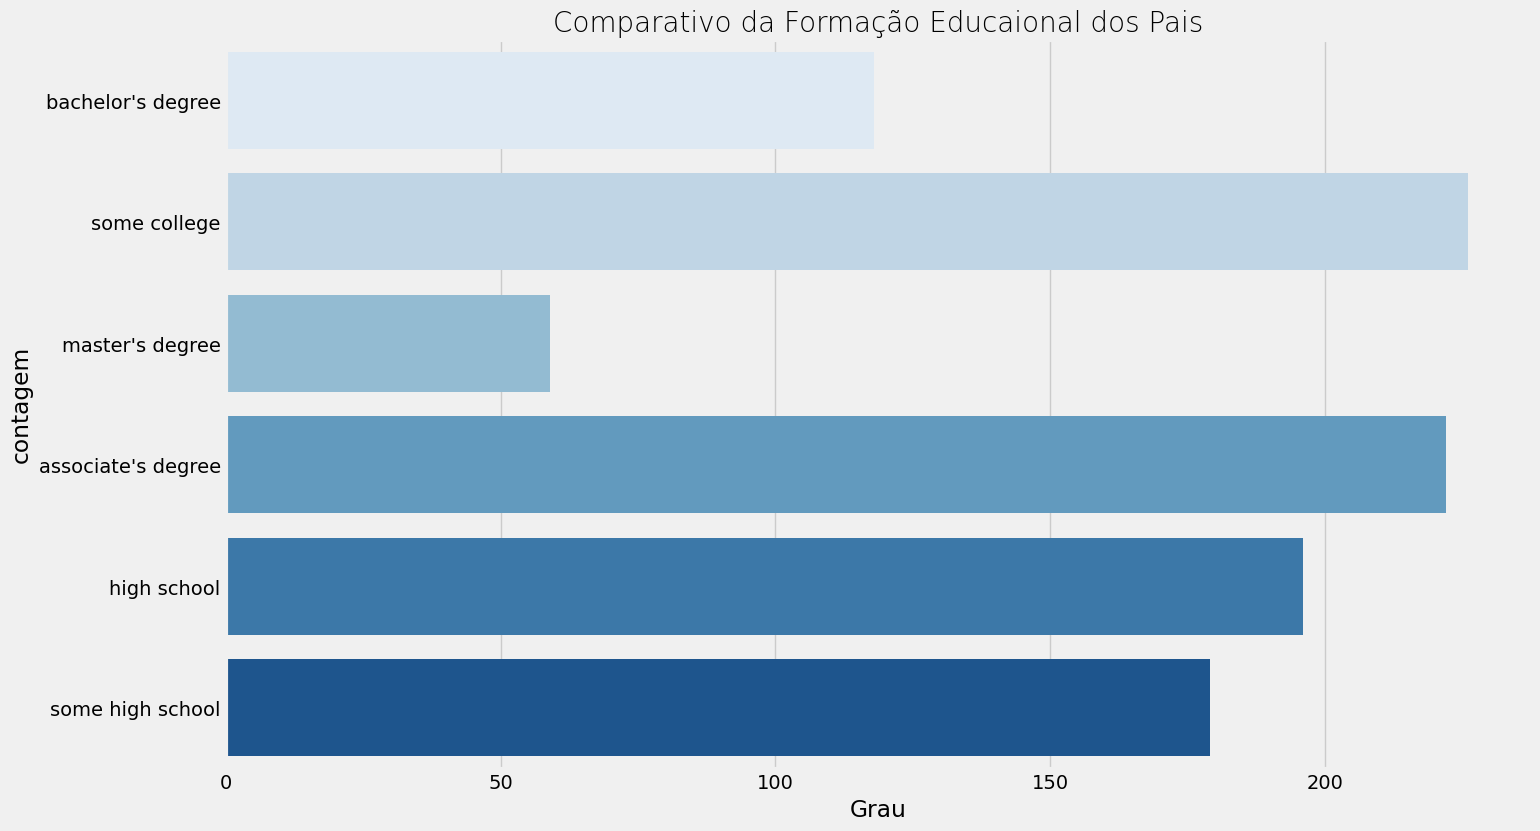

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparativo da Formação Educaional dos Pais', fontweight = 30, fontsize = 20)
plt.xlabel('Grau')
plt.ylabel('contagem')
plt.show()

##### Insights 
- O maior número de pais possui alguma formação universitária.

##### ANÁLISE BIVARIADA (A educação dos pais tem algum impacto no desempenho dos alunos?)

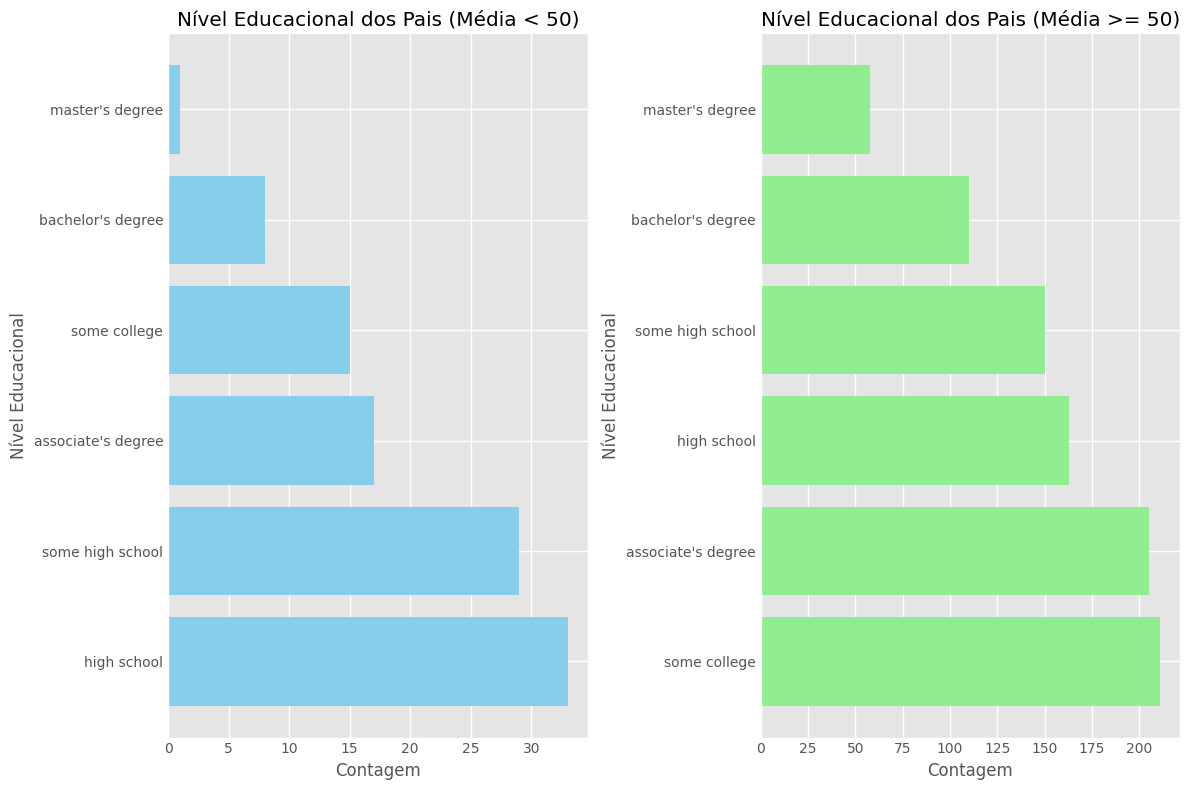

In [112]:
# Contagens para média menor que 50
media_menor_50_educacao_pais = {
    "high school": 33,
    "some high school": 29,
    "associate's degree": 17,
    "some college": 15,
    "bachelor's degree": 8,
    "master's degree": 1
}

# Contagens para média maior que 50
media_maior_50_educacao_pais = {
    "some college": 211,
    "associate's degree": 205,
    "high school": 163,
    "some high school": 150,
    "bachelor's degree": 110,
    "master's degree": 58
}

# Criar uma figura para os gráficos
plt.figure(figsize=(12, 8))

# Gráfico para média menor que 50
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.barh(list(media_menor_50_educacao_pais.keys()), list(media_menor_50_educacao_pais.values()), color='skyblue')
plt.title('Nível Educacional dos Pais (Média < 50)')
plt.xlabel('Contagem')
plt.ylabel('Nível Educacional')

# Gráfico para média maior que 50
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
plt.barh(list(media_maior_50_educacao_pais.keys()), list(media_maior_50_educacao_pais.values()), color='lightgreen')
plt.title('Nível Educacional dos Pais (Média >= 50)')
plt.xlabel('Contagem')
plt.ylabel('Nível Educacional')

# Ajustar o layout
plt.tight_layout()
plt.show()


##### Insights 
- As notas dos alunos cujos pais possuem educação em nível de mestrado e bacharel são mais altas do que as dos outros.

#### 4.4.4 COLUNA ALMOÇO


- Qual tipo de almoço é mais comum entre os alunos?
- Qual é o efeito do tipo de almoço nos resultados dos testes?

##### ANÁLISE UNIVARIADA (Qual tipo de almoço é mais comum entre os alunos?)

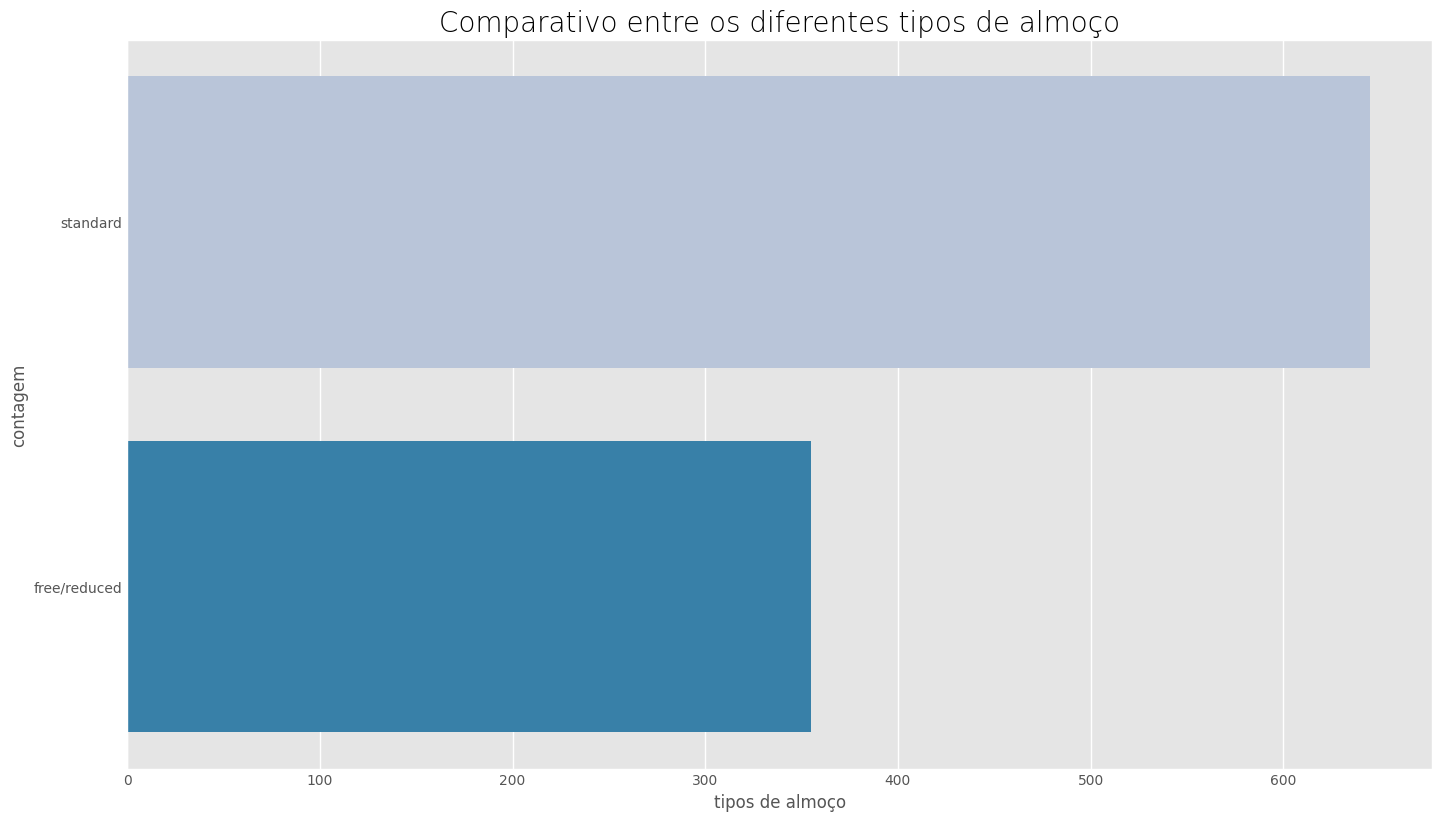

In [76]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparativo entre os diferentes tipos de almoço', fontweight = 30, fontsize = 20)
plt.xlabel('tipos de almoço')
plt.ylabel('contagem')
plt.show()

##### Insights 
- O número de alunos que receberam almoço padrão foi maior do que o de almoço gratuito.

##### ANÁLISE BIVARIADA (O tipo de almoço ingerido tem algum impacto no desempenho dos alunos?)

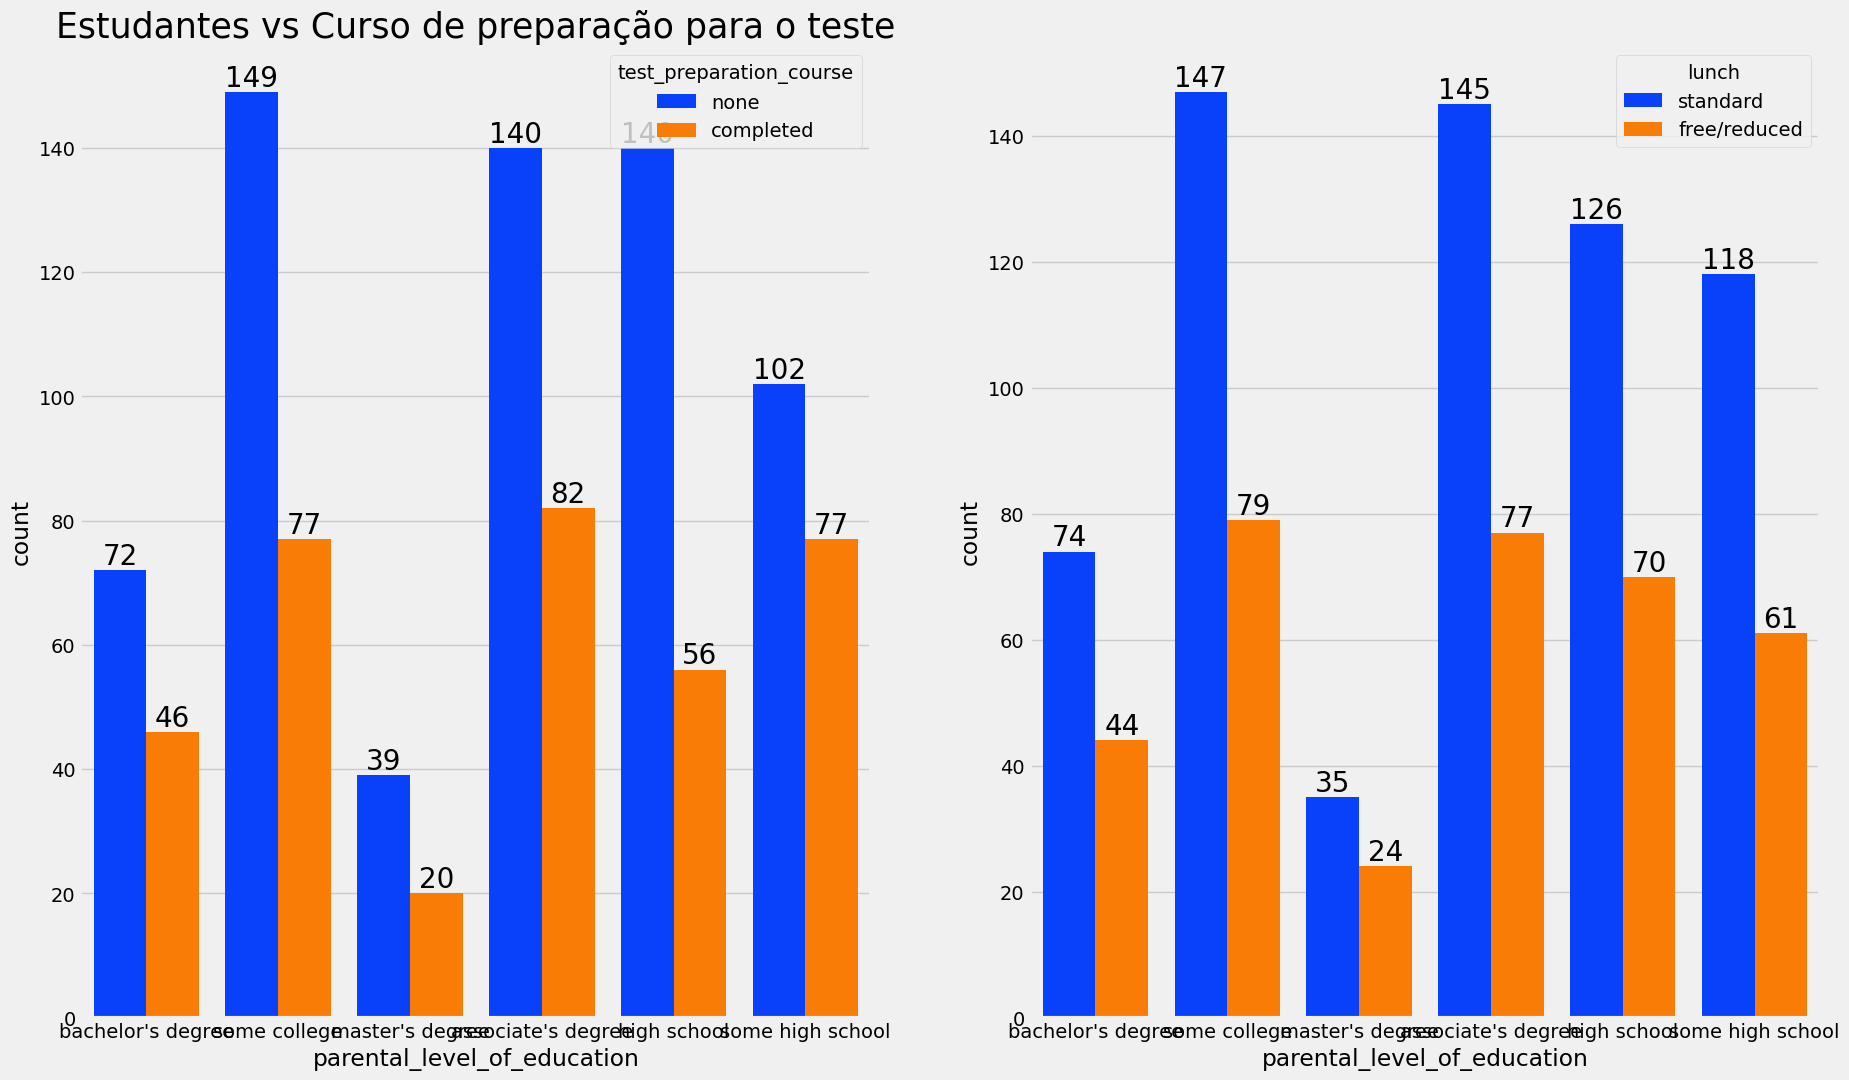

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,12))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Estudantes vs Curso de preparação para o teste',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

##### Insights 
- Alunos que recebem almoço padrão tendem a ter um desempenho melhor do que alunos que recebem almoço gratuito/reduzido.

#### 4.4.5 COLUNA CURSO DE PREPARAÇÃO PARA TESTES

- Qual tipo de almoço é mais comum entre os alunos?
- O curso de preparação para testes tem algum impacto no desempenho dos alunos?

##### ANÁLISE BIVARIADA (O curso de preparação para testes tem algum impacto no desempenho dos alunos?)

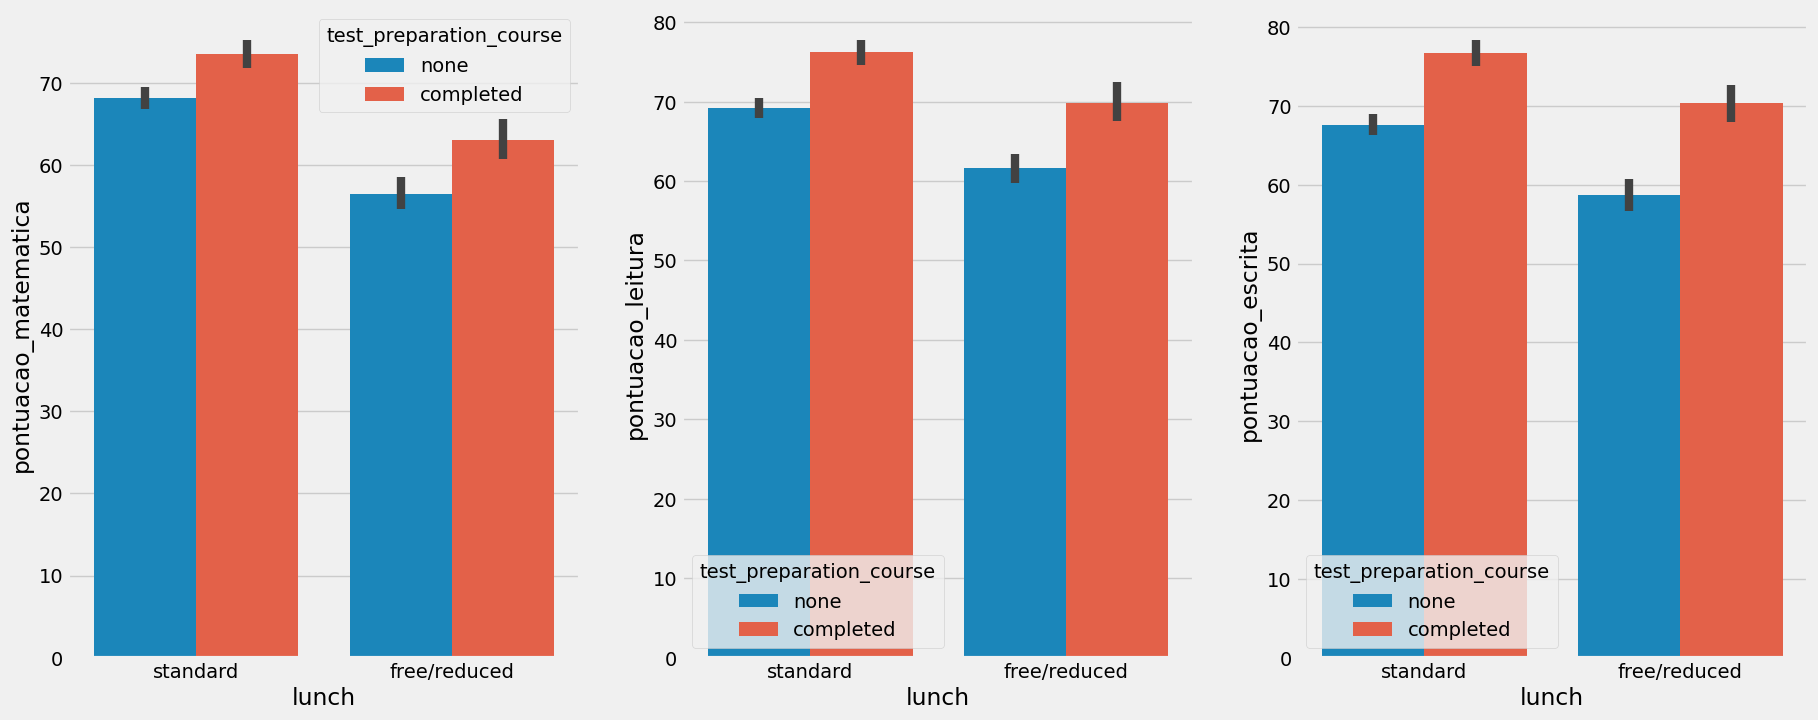

In [75]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.ylabel('pontuacao_matematica')
plt.subplot(1, 3, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.ylabel('pontuacao_leitura')
plt.subplot(1, 3, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.ylabel('pontuacao_escrita')
plt.show()


##### Insights
- Alunos que concluíram o Curso de Preparação para Testes obtiveram notas mais altas nas três categorias do que aqueles que não fizeram o curso.

#### 4.4.6 CHECANDO OUTLIERS

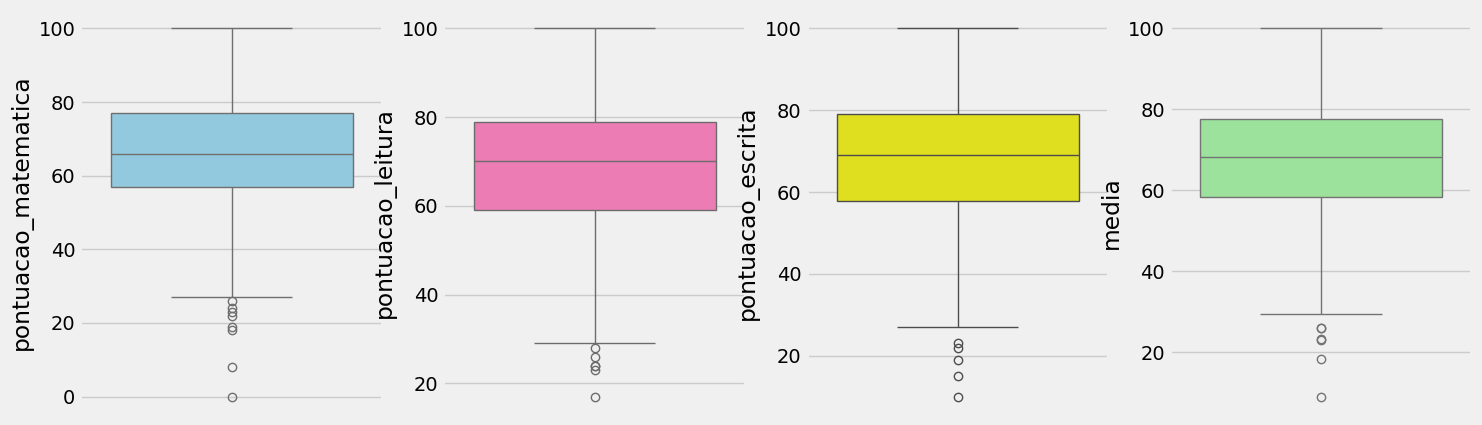

In [65]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.ylabel('pontuacao_matematica')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.ylabel('pontuacao_leitura')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.ylabel('pontuacao_escrita')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.ylabel('media')
plt.show()

#### 4.4.7 ANÁLISE MULTIVARIADA USANDO PAIRPLOT

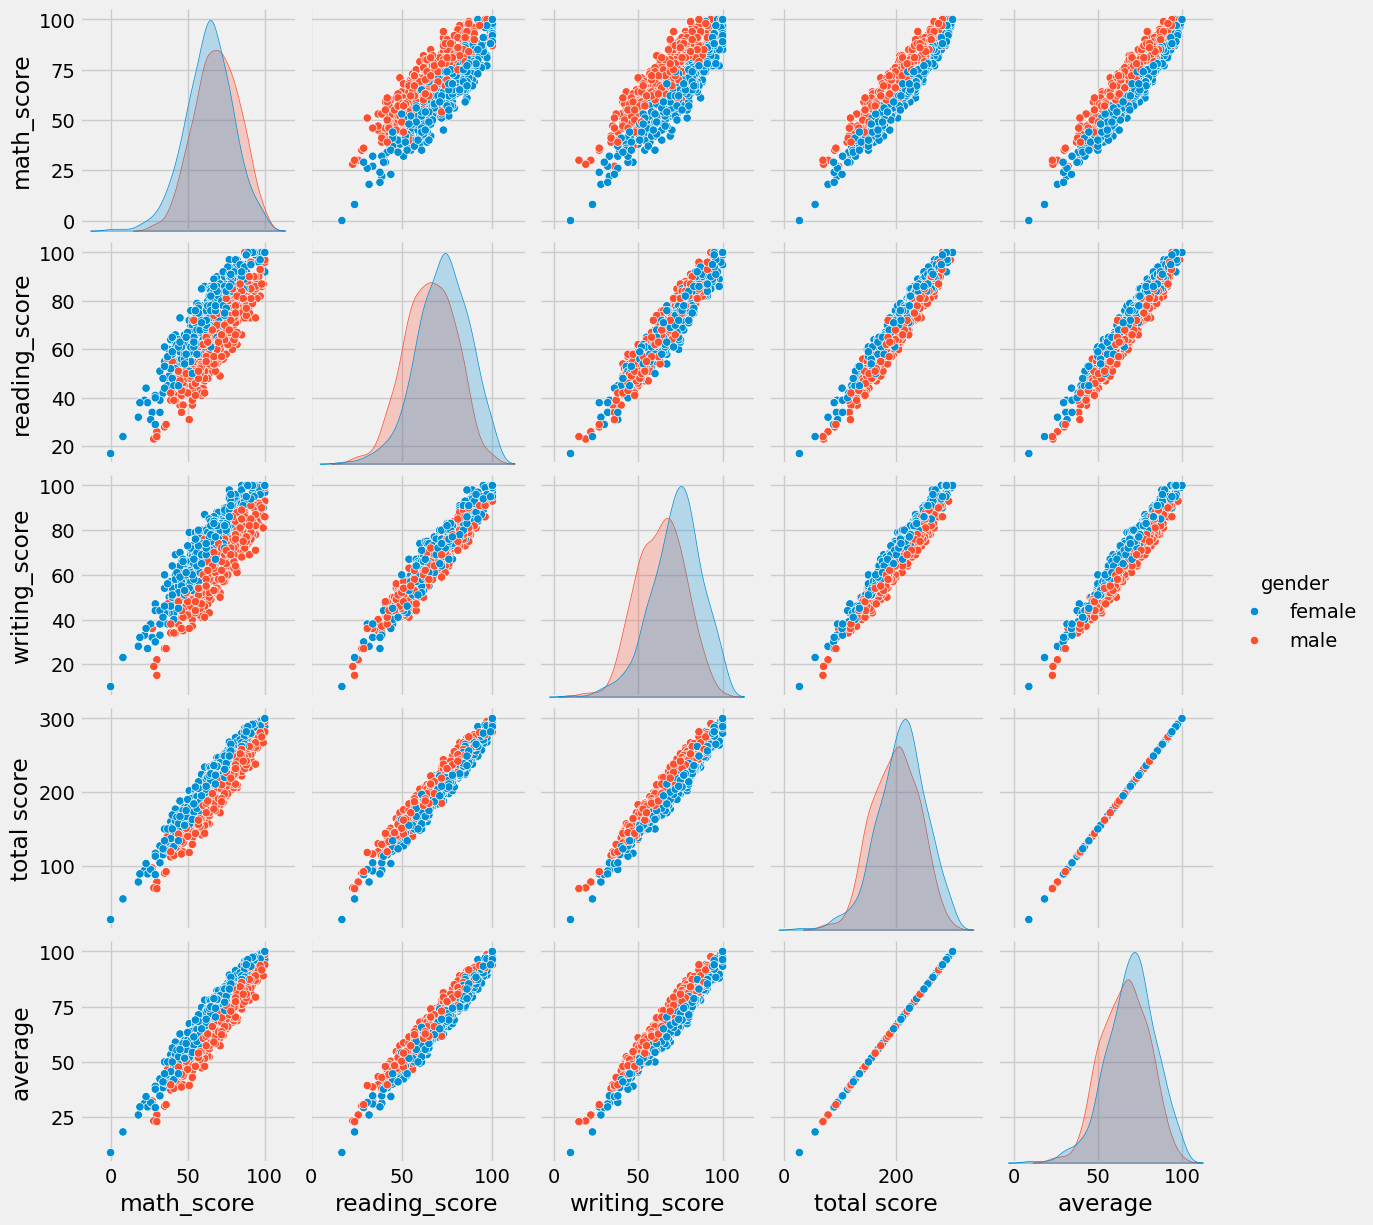

In [63]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
- A partir do gráfico acima, é claro que todas as notas aumentam linearmente entre si.

## 5. Conclusões


- O desempenho dos alunos está relacionado com o tipo de almoço, raça e nível educacional dos pais.
- As alunas têm uma porcentagem de aprovação superior e também são as que obtêm as melhores notas.
- O desempenho dos alunos não está muito relacionado com o curso de preparação para testes.
- Concluir o curso de preparação é benéfico.